In [ ]:
#!pip install google-colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Data/

Mounted at /content/drive
/content/drive/My Drive/Data


In [2]:
import os
import numpy as np, pandas as pd
from PIL import Image
import skimage

In [3]:
IMAGES_DIR = '/content/drive/My Drive/Data/memotion_dataset_7k/en_images/'

labels_df_A = pd.read_csv('/content/drive/My Drive/Data/memotion_dataset_7k/Labels_A.csv')
labels_df_A.head()

descriptions = {}
for row in labels_df_A.index:
  descriptions[labels_df_A.image_name.tolist()[row]] = labels_df_A.text_corrected.tolist()[row]

print(descriptions)

{'image_1.jpg': 'LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIKUT TREND PLAY THE 10 YEARS CHALLENGE AT FACEBOOK imgflip.com', 'image_2.jpeg': 'The best of #10 YearChallenge! Completed in less the 4 years. Kudus to @narendramodi ji 8:05 PM - 16 Jan 2019 from Mumbai  India', 'image_3.JPG': "Sam Thorne @Strippin ( Follow Follow Saw everyone posting these 2009 vs 2019 pics so here's mine 6:23 PM - 12 Jan 2019 O 636 Retweets 3 224 LIKES 65 636 3.2K", 'image_5.png': '10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious 10 Year Challenge Memes | What is #10 Year Challenge?', 'image_6.jpg': '1998: "Don\'t get in car with strangers" 2008: "Don\'t meet people from the internet alone." MemeCenter.com 2019: UBER.. Order yourself a stranger from the internet to get into a car with alone.', 'image_9.jpg': 'Fornite died in 10 months but Minecraft never died in 10 years I am so proud of this community', 'image_10.png': "FACEBOOK '10 YEAR CHALLENGE': A PLOY OR A SIMPLE MEME? mo by eXo Hạ Minh Le 18 Jan 2018",

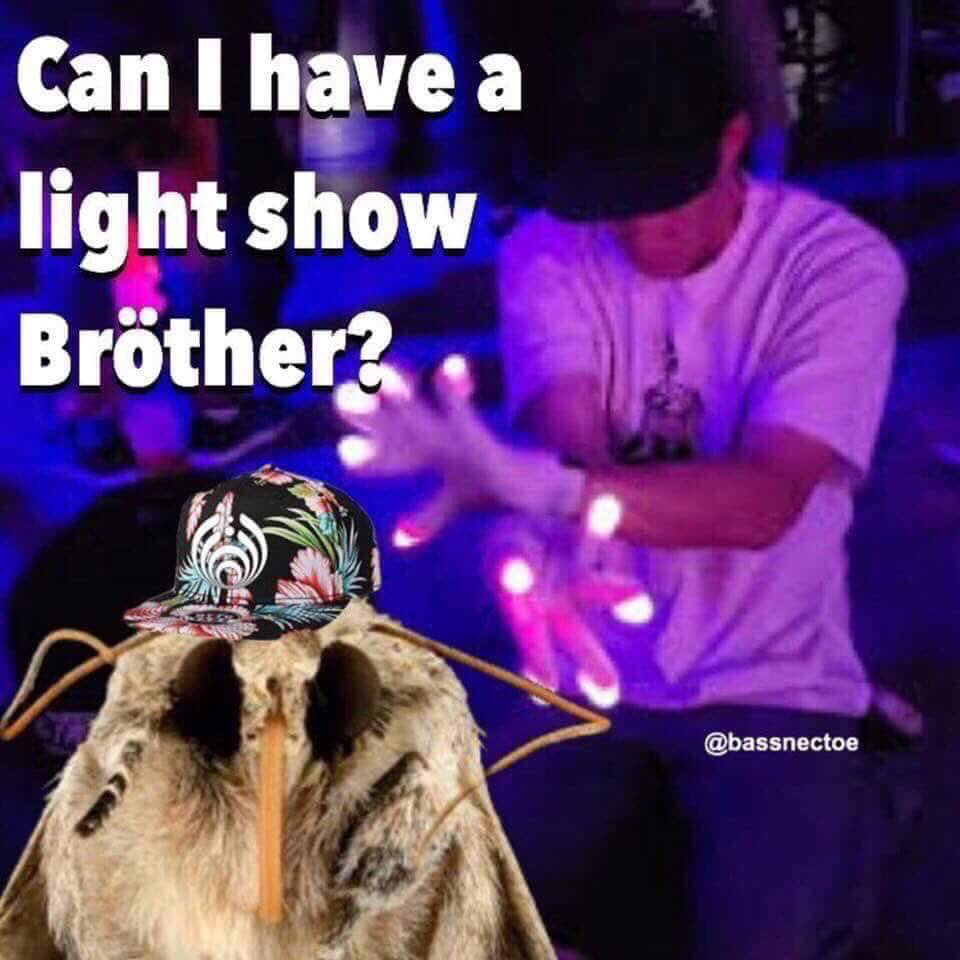

In [4]:
images = [filename for filename in os.listdir('/content/drive/My Drive/Data/memotion_dataset_7k/en_images/')]
image = Image.open(os.path.join('/content/drive/My Drive/Data/memotion_dataset_7k/en_images/', images[0])).convert("RGB")
image

In [5]:
images[0]

'image_5750.jpg'

In [6]:
descriptions[images[0]]

'Can I have a light show Brother? @bassnectoe'

In [7]:
import requests

url = "https://microsoft-computer-vision3.p.rapidapi.com/analyze"

querystring = {"language":"en","descriptionExclude[0]":"Celebrities","visualFeatures[0]":"ImageType","details[0]":"Celebrities"}

payload = {"url": "https://i.dailymail.co.uk/1s/2020/03/12/21/25906550-8106847-image-a-76_1584049433412.jpg"}
headers = {
	"content-type": "application/json",
	"X-RapidAPI-Key": "36befc3fd5msh5f00df346fcfabfp1e44fdjsneedfc938a87d",
	"X-RapidAPI-Host": "microsoft-computer-vision3.p.rapidapi.com"
}

response = requests.request("POST", url, json=payload, headers=headers, params=querystring)

print(response.text)

{"messages":"The API is unreachable, please contact the API provider", "info": "Your Client (working) ---> Gateway (working) ---> API (not working)"}


In [8]:
url = "https://ultimate-cloud-vision-image.p.rapidapi.com/google/cloudvision/faces"

payload = {"image": "https://img.grouponcdn.com/deal/j57dEv5HEmhj1nMY11Uf/no-2048x1229/v1/t600x362.jpg"}
headers = {
	"content-type": "application/json",
	"X-RapidAPI-Key": "36befc3fd5msh5f00df346fcfabfp1e44fdjsneedfc938a87d",
	"X-RapidAPI-Host": "ultimate-cloud-vision-image.p.rapidapi.com"
}

response = requests.request("POST", url, json=payload, headers=headers)

print(response.text)

[{"landmarks":[{"type":"LEFT_EYE","position":{"x":250.36114501953125,"y":161.1756591796875,"z":-0.000030517578125}},{"type":"RIGHT_EYE","position":{"x":347.6378479003906,"y":161.10244750976562,"z":-1.2169876098632812}},{"type":"LEFT_OF_LEFT_EYEBROW","position":{"x":220.3564910888672,"y":137.4438934326172,"z":5.50369930267334}},{"type":"RIGHT_OF_LEFT_EYEBROW","position":{"x":276.7227783203125,"y":143.9682159423828,"z":-19.502166748046875}},{"type":"LEFT_OF_RIGHT_EYEBROW","position":{"x":320.7251281738281,"y":143.49783325195312,"z":-20.080490112304688}},{"type":"RIGHT_OF_RIGHT_EYEBROW","position":{"x":377.111083984375,"y":136.95603942871094,"z":3.5374436378479004}},{"type":"MIDPOINT_BETWEEN_EYES","position":{"x":298.26776123046875,"y":161.36753845214844,"z":-18.685232162475586}},{"type":"NOSE_TIP","position":{"x":298.5534973144531,"y":216.45050048828125,"z":-37.12776184082031}},{"type":"UPPER_LIP","position":{"x":298.0343017578125,"y":247.33316040039062,"z":-13.31096076965332}},{"type":"

In [9]:
import requests

url = "https://ultimate-cloud-vision-image.p.rapidapi.com/google/cloudvision/labels"

payload = {"image": "https://i.dailymail.co.uk/1s/2020/03/12/21/25906550-8106847-image-a-76_1584049433412.jpg"}
headers = {
	"content-type": "application/json",
	"X-RapidAPI-Key": "36befc3fd5msh5f00df346fcfabfp1e44fdjsneedfc938a87d",
	"X-RapidAPI-Host": "ultimate-cloud-vision-image.p.rapidapi.com"
}

response = requests.request("POST", url, json=payload, headers=headers)

print(response.text)

[{"description":"Cloud","score":0.9761345386505127,"confidence":0,"topicality":0.9761345386505127},{"description":"Water","score":0.9700040221214294,"confidence":0,"topicality":0.9700040221214294},{"description":"Sky","score":0.9643319249153137,"confidence":0,"topicality":0.9643319249153137},{"description":"Water resources","score":0.94570392370224,"confidence":0,"topicality":0.94570392370224},{"description":"Plant","score":0.9183246493339539,"confidence":0,"topicality":0.9183246493339539},{"description":"Felidae","score":0.9139398336410522,"confidence":0,"topicality":0.9139398336410522},{"description":"Cat","score":0.896258533000946,"confidence":0,"topicality":0.896258533000946},{"description":"Mountain","score":0.8812713623046875,"confidence":0,"topicality":0.8812713623046875},{"description":"Carnivore","score":0.8741257190704346,"confidence":0,"topicality":0.8741257190704346},{"description":"Grass","score":0.822623610496521,"confidence":0,"topicality":0.822623610496521}]


In [10]:
#os.environ['COMPUTER_VISION_SUBSCRIPTION_KEY'] = '7d68d135225d4c46bb918cb926878505'
#os.environ['COMPUTER_VISION_ENDPOINT'] = 'https://imagecapanalysis.cognitiveservices.azure.com/'
%env COMPUTER_VISION_SUBSCRIPTION_KEY=7d68d135225d4c46bb918cb926878505
%env COMPUTER_VISION_ENDPOINT=https://imagecapanalysis.cognitiveservices.azure.com/

env: COMPUTER_VISION_SUBSCRIPTION_KEY=7d68d135225d4c46bb918cb926878505
env: COMPUTER_VISION_ENDPOINT=https://imagecapanalysis.cognitiveservices.azure.com/


In [11]:
#!pip install --upgrade azure-cognitiveservices-vision-computervision

In [12]:
#!pip install pillow

In [13]:
"""from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

'''
Authenticate
Authenticates your credentials and creates a client.
'''
subscription_key = "7d68d135225d4c46bb918cb926878505"
endpoint = "https://imagecapanalysis.cognitiveservices.azure.com/"

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
'''
END - Authenticate
'''

'''
Quickstart variables
These variables are shared by several examples
'''
# Images used for the examples: Describe an image, Categorize an image, Tag an image, 
# Detect faces, Detect adult or racy content, Detect the color scheme, 
# Detect domain-specific content, Detect image types, Detect objects
images_folder = '/content/drive/My Drive/Data/memotion_dataset_7k/en_images/'
images = [image for image in os.listdir(images_folder)]
remote_image_url = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/landmark.jpg"
'''
END - Quickstart variables
'''


'''
Tag an Image - remote
This example returns a tag (key word) for each thing in the image.
'''
print("===== Tag an image - remote =====")
# Call API with remote image
tags_result_remote = computervision_client.tag_image(remote_image_url )

# Print results with confidence score
print("Tags in the remote image: ")
if (len(tags_result_remote.tags) == 0):
    print("No tags detected.")
else:
    for tag in tags_result_remote.tags:
        print("'{}' with confidence {:.2f}%".format(tag.name, tag.confidence * 100))
print()
'''
END - Tag an Image - remote
'''
print("End of Computer Vision quickstart.")"""

'from azure.cognitiveservices.vision.computervision import ComputerVisionClient\nfrom azure.cognitiveservices.vision.computervision.models import OperationStatusCodes\nfrom azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes\nfrom msrest.authentication import CognitiveServicesCredentials\n\nfrom array import array\nimport os\nfrom PIL import Image\nimport sys\nimport time\n\n\'\'\'\nAuthenticate\nAuthenticates your credentials and creates a client.\n\'\'\'\nsubscription_key = "7d68d135225d4c46bb918cb926878505"\nendpoint = "https://imagecapanalysis.cognitiveservices.azure.com/"\n\ncomputervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))\n\'\'\'\nEND - Authenticate\n\'\'\'\n\n\'\'\'\nQuickstart variables\nThese variables are shared by several examples\n\'\'\'\n# Images used for the examples: Describe an image, Categorize an image, Tag an image, \n# Detect faces, Detect adult or racy content, Detect the color scheme,

In [14]:
#caption_result_remote = computervision_client.describe_image(remote_image_url )
#$caption_result_remote.as_dict()

In [15]:
os.path.join(IMAGES_DIR, images[0])

'/content/drive/My Drive/Data/memotion_dataset_7k/en_images/image_5750.jpg'

In [16]:
#img =Image.open(os.path.join(IMAGES_DIR, images[0])).convert("RGB")
img = open(os.path.join(IMAGES_DIR, images[140]), "rb")
img

<_io.BufferedReader name='/content/drive/My Drive/Data/memotion_dataset_7k/en_images/image_5916.jpg'>

In [17]:
#caption_result_remote = computervision_client.describe_image_in_stream(img)
#caption_result_remote.as_dict()

In [ ]:
#results = caption_result_remote.as_dict()
#results['captions'][0]['text']

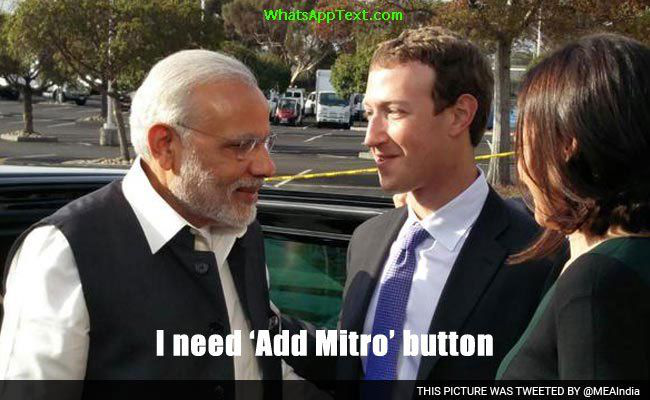

In [18]:
Image.open(os.path.join(IMAGES_DIR, images[140])).convert("RGB")

In [19]:
"""image_list, caption = [],[]
for image in images[:1000]:
  img = open(os.path.join(IMAGES_DIR, image), "rb")
  caption_result_remote = computervision_client.describe_image_in_stream(img)
  try:
    results = caption_result_remote.as_dict()
    caption.append(results['captions'][0]['text'])
    image_list.append(image)
    print(image, results['captions'][0]['text'])
  except:
    caption.append('NA')
    image_list.append(image)
    print(image, caption)"""

'image_list, caption = [],[]\nfor image in images[:1000]:\n  img = open(os.path.join(IMAGES_DIR, image), "rb")\n  caption_result_remote = computervision_client.describe_image_in_stream(img)\n  try:\n    results = caption_result_remote.as_dict()\n    caption.append(results[\'captions\'][0][\'text\'])\n    image_list.append(image)\n    print(image, results[\'captions\'][0][\'text\'])\n  except:\n    caption.append(\'NA\')\n    image_list.append(image)\n    print(image, caption)'

In [20]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 33.4 MB/s 
     |████████████████████████████████| 6.6 MB 56.2 MB/s 
     |████████████████████████████████| 120 kB 73.2 MB/s 


In [21]:
file_paths = [os.path.join(IMAGES_DIR, x) for x in os.listdir(IMAGES_DIR)]
file_paths

['/content/drive/My Drive/Data/memotion_dataset_7k/en_images/image_5750.jpg',
 '/content/drive/My Drive/Data/memotion_dataset_7k/en_images/image_5751.jpg',
 '/content/drive/My Drive/Data/memotion_dataset_7k/en_images/image_5752.jpg',
 '/content/drive/My Drive/Data/memotion_dataset_7k/en_images/image_5753.png',
 '/content/drive/My Drive/Data/memotion_dataset_7k/en_images/image_5754.png',
 '/content/drive/My Drive/Data/memotion_dataset_7k/en_images/image_5755.jpg',
 '/content/drive/My Drive/Data/memotion_dataset_7k/en_images/image_5757.png',
 '/content/drive/My Drive/Data/memotion_dataset_7k/en_images/image_5758.jpg',
 '/content/drive/My Drive/Data/memotion_dataset_7k/en_images/image_5759.jpg',
 '/content/drive/My Drive/Data/memotion_dataset_7k/en_images/image_5761.jpg',
 '/content/drive/My Drive/Data/memotion_dataset_7k/en_images/image_5762.jpg',
 '/content/drive/My Drive/Data/memotion_dataset_7k/en_images/image_5763.jpg',
 '/content/drive/My Drive/Data/memotion_dataset_7k/en_images/ima

In [22]:
import torch
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer

In [23]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, 

In [40]:
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    #print('Processing Image:', image_path)
    try:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
          i_image = i_image.convert(mode="RGB")

        images.append(i_image)
    except:
      print(i_image, "is corrupt.")
    
    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, **gen_kwargs)

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    ret_list = [preds, [i.split('/')[-1] for i in image_paths]]
    req_list = []
    for i in range(0, len(ret_list[0])):
      req_list.append([ret_list[0][i], ret_list[1][i]])
  return req_list

file_paths = [os.path.join(IMAGES_DIR, x) for x in os.listdir(IMAGES_DIR)]


In [56]:
len(file_paths)/8

693.0

In [59]:
file_paths[5543]

'/content/drive/My Drive/Data/memotion_dataset_7k/en_images/image_704.jpg'

In [57]:
list(range(0, len(file_paths), 8))[-10:]

[5464, 5472, 5480, 5488, 5496, 5504, 5512, 5520, 5528, 5536]

In [63]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [64]:
for i in range(0, len(file_paths), 8):
    prediction_batch = predict_step(file_paths[i:i+8])
    pred_df = pd.DataFrame(prediction_batch, columns=['caption', 'image'])
    print('Running batch', str(i), 'to', str(i+8))
    print(pred_df.head(2))
    print("##########################\n")
    output_path='/content/drive/My Drive/Data/memotion_dataset_7k/image_captions.csv'
    pred_df.to_csv(output_path, mode='a', header=not os.path.exists(output_path), index=False)

Running batch 0 to 8
                                   caption           image
0  a cat sitting on top of a person's head  image_5750.jpg
1             a man wearing a suit and tie  image_5751.jpg
##########################

Running batch 8 to 16
                                             caption           image
0  a close up picture of a person wearing a red h...  image_5759.jpg
1       a man sitting in front of a computer monitor  image_5761.jpg
##########################

Running batch 16 to 24
                             caption           image
0   a man is talking on a cell phone  image_5769.jpg
1  a person with a cat on their head  image_5771.jpg
##########################

Running batch 24 to 32
                                             caption           image
0  a cartoon character is sitting in front of a sign  image_5781.jpg
1  a toy train with a cartoon character on top of it  image_5782.jpg
##########################

Running batch 32 to 40
                          

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Running batch 624 to 632
                                             caption           image
0        a woman in a suit and tie holding up a sign  image_6512.jpg
1  a collage of photos of a man in a black and wh...  image_6513.png
##########################

Running batch 632 to 640
                                             caption           image
0        a police officer in uniform on a cell phone  image_6523.png
1  a large group of people standing in front of a...  image_6524.png
##########################

Running batch 640 to 648
                              caption           image
0  a man is looking at his cell phone  image_6534.jpg
1    a man is talking on a cell phone  image_6535.jpg
##########################

Running batch 648 to 656
                                             caption           image
0  a man talking on a cell phone while holding a ...  image_6543.png
1                   a man is talking on a cell phone  image_6545.png
##########################

Runni

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Running batch 744 to 752
                                             caption           image
0  a cartoon character is sitting on top of a toy...  image_6665.png
1                  a man with a beard and a mustache  image_6666.jpg
##########################

Running batch 752 to 760
                                        caption           image
0  a man in a suit and tie posing for a picture  image_6679.jpg
1       a man in a suit talking on a cell phone  image_6681.jpg
##########################

Running batch 760 to 768
                                            caption           image
0   a woman in a black shirt and a picture of a man  image_6691.png
1  a man sitting at a table talking on a cell phone  image_6692.jpg
##########################

Running batch 768 to 776
                                             caption           image
0         a cartoon of a cat and a cartoon of a bear  image_6702.jpg
1  a collage of a cartoon character with a cat on...  image_6703.png
######

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Running batch 808 to 816
                                             caption           image
0            a man in a suit with a gun in his mouth  image_6757.png
1  a woman is holding up a sign that says "don't ...  image_6758.png
##########################

Running batch 816 to 824
                                  caption           image
0       a man in a suit is reading a book  image_6769.png
1  a man in a suit is reading a newspaper  image_6770.jpg
##########################

Running batch 824 to 832
                                             caption           image
0  a man sitting at a table in front of a group o...  image_6778.jpg
1            a man in a suit talking on a cell phone  image_6779.png
##########################

Running batch 832 to 840
                                   caption           image
0             a man wearing a suit and tie  image_6794.jpg
1  a man in a suit talking on a cell phone  image_6795.jpg
##########################

Running batch 840 to 84